In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/BOAZ Analysis/BOAZ 미니 프로젝트1

/content/drive/MyDrive/BOAZ Analysis/BOAZ 미니 프로젝트1


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv', encoding = 'utf-8')
test = pd.read_csv('test.csv', encoding = 'utf-8')
sample_submission = pd.read_csv('sample_submission.csv', encoding = 'utf-8')

In [ ]:
def data_to_title(x):
    try:
        return x.split('.')[0]
    except:
        return ' '

train['title'] = train['data'].apply(lambda x : data_to_title(x))
train.to_csv('train_title and data_0216.csv', index = False, encoding = 'utf-8')

In [ ]:
train = train.dropna(how = 'any')
train['data'] = train['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test['data'] = test['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','을']

<ipython-input-6-f7151069fc3d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train['data'] = train['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-6-f7151069fc3d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test['data'] = test['data'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


<AxesSubplot:>

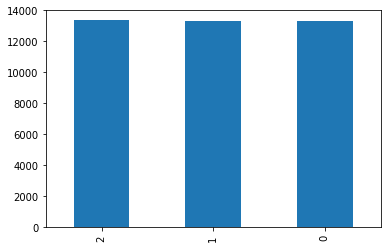

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train['category'].value_counts().plot(kind = 'bar')

In [ ]:
train['category'].value_counts()

2    13358
1    13335
0    13299
Name: category, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(train['data'], train['category'], test_size = 0.2, stratify = train['category'], random_state = 42)

tfidfv = TfidfVectorizer(ngram_range = (1, 2))
tfidfv.fit(X_train)
X_train_transform = tfidfv.transform(X_train)
X_test_transform = tfidfv.transform(X_test)

import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(random_state = 42)
lgb_clf.fit(X_train_transform, y_train)
lgb_pred = lgb_clf.predict(X_test_transform)

accuracy_score(y_test, lgb_pred), f1_score(y_test, lgb_pred, average = 'macro')

(0.8017252156519565, 0.8017242591741924)

In [ ]:
train['data']

0        신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마...
1        학교이름에 남자도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등 글짓...
2        빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올림픽에...
3        티비 세세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일이 생...
4        무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타이...
                               ...                        
39995    시간유연근무제 저는 국립대에서 일하고 있는 비정규직 근로자입니다동시에  두 자녀의 ...
39996    소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다 소년법...
39997    무서운데 지켜야 할게 있어요 도와주세요 안녕하세요  한부모엄마 입니다양육비를 받고 ...
39998    교복에  고정식 이름표를 달게 하는 것을 금지해 주세요 교복에 이름표를 박아놓아 탈...
39999    합의성관계 가능 나이연령을 올리십시오 제가 형법공부를하다가 문제를풀고있는데금지착오부...
Name: data, Length: 39992, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

tfidfv = TfidfVectorizer(ngram_range = (1, 2))
tfidfv.fit(train['data'])
X_train_transform = tfidfv.transform(train['data'])
X_test_transform = tfidfv.transform(test['data'])

import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(random_state = 42)
lgb_clf.fit(X_train_transform, train['category'])
lgb_pred = lgb_clf.predict(X_test_transform)

sample_submission['category'] = lgb_pred
sample_submission.to_csv('청와대 청원 tfidf 후 randomforest_0216.csv', index = False)